In [2]:
import time
import random
from pdp_lib import processing as proc
from pdp_lib import util
from GA_lib import GA
from GA_lib import operation
from GA_lib import evaluate
from GA_lib import modify

# Load file (Use realative path), Create distances and duration tables


In [5]:
start_time = time.time()
# use 'relative path' in filename
filename = 'pdp_instances/LiLim/pdp_100/lc107.txt'

numVehicles, LoadCapacities, speed, data = proc.load_file(filename)
LOCATIONS = data[0]
DEMANDS = data[1]
timeWindows = data[2]
serviceTimes = data[3]
pickupSiblings = data[4]
deliverySiblings = data[5]
requestType = data[6]
REQUESTS = proc.generate_request(pickupSiblings,deliverySiblings,requestType)
DISTANCES = proc.createDistanceTable(LOCATIONS)
DURATIONS = proc.createDurationTable(LOCATIONS, DISTANCES, serviceTimes, speed)


print(" processing time --- %s seconds ---" % (time.time() - start_time))

 processing time --- 0.03200101852416992 seconds ---


# Unoptimized Routes

Unoptimized distances is: 3367.79589042


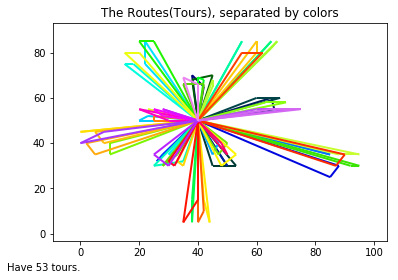

In [6]:
unlimitedVehicles=300
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,unlimitedVehicles, DEMANDS, LoadCapacities,maxSpot=2)
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Unoptimized distances is: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)

# Create a chromosome.

Chromosome initializing time --- 1.814103126525879 seconds ---
Tour Distances of chromosome: 1646.76668339


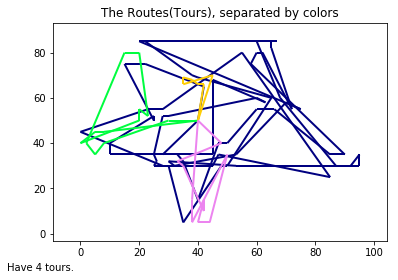

[[0, [45, 46, 39, 32, 15, 26, 52, 23, 44, 43, 38, 51, 16, 36, 8, 21, 50, 6, 0, 35, 27, 11, 37, 24, 2, 41, 3, 49, 48, 20, 42, 7, 40, 30, 25, 12, 13, 33, 47], [5, 13, 17, 18, 24, 25, 32, 31, 43, 41, 57, 67, 63, 90, 87, 86, 81, 104, 78, 76, 98, 96, 95, 83, 94, 93, 92, 16, 82, 84, 74, 44, 46, 72, 70, 71, 73, 77, 79, 85, 97, 100, 106, 12, 14, 9, 6, 88, 61, 103, 64, 60, 45, 48, 39, 101, 28, 26, 23, 102, 4, 99, 80, 66, 68, 51, 50, 52, 22, 21, 91, 89, 1, 75, 69, 47, 105, 49]], [1, [17, 10, 9, 18, 19, 14], [20, 33, 35, 37, 19, 15, 27, 30, 29, 38, 36, 34]], [2, [1, 4, 5], [3, 7, 8, 11, 10, 2]], [3, [34, 22, 28, 29, 31], [65, 42, 40, 54, 55, 56, 53, 62, 58, 59]], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [7]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Try restricting the 'max spots' to visit not more than 10 spots per vehicle

Chromosome initializing time --- 0.017984867095947266 seconds ---
Tour Distances of chromosome: 2343.0414326


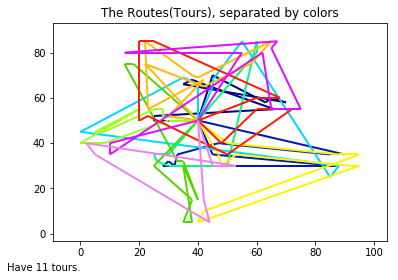

[[0, [1, 43, 12, 5, 45], [24, 25, 86, 3, 8, 10, 84, 88, 89, 2]], [1, [24, 42, 39, 35, 23], [76, 81, 104, 67, 43, 44, 46, 48, 79, 69]], [2, [4, 20, 0, 52, 40], [7, 11, 39, 101, 77, 80, 100, 106, 1, 75]], [3, [50, 27, 32, 26, 25], [96, 97, 61, 103, 45, 50, 52, 49, 47, 105]], [4, [21, 30, 31, 8, 22], [17, 18, 42, 41, 57, 40, 58, 60, 59, 51]], [5, [10, 17, 19, 11, 13], [20, 33, 38, 30, 36, 34, 26, 23, 102, 22]], [6, [38, 41, 33, 28, 36], [63, 78, 71, 54, 56, 70, 73, 74, 64, 66]], [7, [2, 51, 15, 3, 6], [13, 5, 98, 93, 6, 9, 14, 28, 4, 21]], [8, [14, 44, 7, 34, 47], [65, 90, 83, 62, 27, 29, 16, 12, 85, 91]], [9, [49, 48, 16, 46, 9], [32, 31, 95, 87, 82, 94, 92, 19, 15, 99]], [10, [18, 37, 29], [55, 53, 35, 37, 72, 68]], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [8]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Test Crossover

In [9]:

parent1 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10000)
parent2 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10000)

In [10]:
start_time = time.time()
maxSpot = 10000
child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2, DEMANDS, LoadCapacities,maxSpot)
dist = evaluate.chromosomeRoutesDistance(parent1,DISTANCES)

print("Chromosome crossover time --- %s seconds ---" % (time.time()-start_time))
print('Parent1 Distances of chromosome: '+str(dist))
dist = evaluate.chromosomeRoutesDistance(parent2,DISTANCES)
print('Parent2 Distances of chromosome: '+str(dist))
print (child1)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('Child2 Distances of chromosome: '+str(dist))


Chromosome crossover time --- 0.002976655960083008 seconds ---
Parent1 Distances of chromosome: 1697.35807878
Parent2 Distances of chromosome: 1601.54116931
[[2, [6, 4, 2, 51, 7], [5, 7, 13, 98, 93, 14, 16, 11, 12, 9]], [3, [], []], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [0, [46, 48, 40, 35, 37, 47, 9, 5, 18, 42, 31, 1, 29, 8, 0, 33, 39, 41, 24, 34, 21, 25, 43, 44, 20, 26, 14, 52, 38, 50, 3, 45, 28, 49, 22, 12, 36, 16, 27, 32], [42, 41, 54, 55, 63, 65, 67, 32, 31, 24, 25, 17, 18, 3, 96, 95, 90, 87, 86, 81, 104, 78, 76, 70, 71, 83, 82, 94, 92, 19, 15, 8, 10, 27, 29, 35, 37, 40, 62, 74, 53, 56, 58, 44, 45, 39, 101, 46, 61, 103, 72, 73, 84, 85, 88, 97, 100, 106, 99, 6, 4, 89, 79, 77, 80, 59, 51, 68, 64, 69, 66, 50, 52, 91, 1, 2, 75, 49, 47, 105

In [11]:
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('old Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('old Child2 Distances of chromosome: '+str(dist))
for i in range(100):
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2, DEMANDS, LoadCapacities,maxSpot)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('new Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('new Child2 Distances of chromosome: '+str(dist))


old Child1 Distances of chromosome: 1628.23028244
[[3, [], []], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [1, [51, 27, 43, 36, 47, 35, 33, 44, 40], [67, 63, 98, 90, 83, 93, 70, 73, 77, 84, 85, 89, 91, 80, 66, 69, 50, 49]], [0, [0, 11, 21, 3, 42, 49, 45, 17, 14, 24, 28, 20, 5, 8, 9, 34, 48, 1, 10, 31, 26, 32, 23, 12, 16, 30, 22, 15, 18, 29, 38, 39, 41, 19, 46, 25, 37, 50, 52, 7], [65, 20, 24, 25, 3, 96, 95, 87, 86, 76, 78, 81, 104, 54, 55, 57, 41, 42, 43, 32, 31, 33, 17, 18, 19, 15, 27, 29, 35, 37, 10, 8, 94, 92, 82, 71, 74, 62, 40, 53, 56, 58, 44, 45, 46, 61, 103, 72, 97, 16, 28, 30, 38, 36, 39, 101, 51, 48, 59, 60, 79, 64, 68, 34, 23, 102, 6, 4, 12, 100, 106, 99, 88, 2, 1, 75, 21, 52, 47, 105]], [2, [6, 4, 2, 13], [5, 7, 13, 14, 11, 9, 26, 22]

new Child1 Distances of chromosome: 1588.03671866
[[0, [46, 48, 40, 35, 37, 47, 9, 5, 18, 42, 31, 1, 29, 8, 0, 33, 39, 41, 24, 34, 21, 25, 43, 44, 20, 26, 14, 52, 38, 50, 3, 45, 28, 49, 22, 12, 36, 16, 27, 32, 51], [42, 41, 54, 55, 63, 65, 67, 32, 31, 24, 25, 17, 18, 3, 98, 96, 95, 90, 87, 86, 81, 104, 78, 76, 70, 71, 83, 82, 94, 92, 19, 15, 8, 10, 27, 29, 35, 37, 40, 62, 74, 53, 56, 58, 44, 45, 39, 101, 46, 61, 103, 72, 73, 84, 85, 93, 88, 97, 100, 106, 99, 6, 4, 89, 79, 77, 80, 59, 51, 68, 64, 69, 66, 50, 52, 91, 1, 2, 75, 49, 47, 105]], [1, [23, 30, 11, 17, 19, 10, 15, 7], [20, 33, 43, 57, 60, 38, 30, 16, 12, 28, 48, 36, 34, 23, 102, 21]], [3, [], []], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [2, [6, 4, 2, 13], [5, 7, 13, 14, 11, 9, 26, 22]

# Try GA !!!

In [12]:
start_time = time.time()
population_size = 100
populations = []
for i in range(population_size):
    chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10000)
    populations.append(chromosome)
print("Populations creation time --- %s seconds ---" % (time.time()-start_time))  
##########################################################################


Populations creation time --- 191.08874440193176 seconds ---


Crossovers time --- 31.26578640937805 seconds ---
Distances of the best chromosome: 1425.47272025
[[0, [30, 20, 43, 21, 23, 18, 36, 35, 14, 48, 9, 47, 32, 52, 26, 28, 10, 24, 1, 4, 34, 38, 16, 31, 15, 29, 41, 0, 51, 46, 25, 19, 6, 12, 3, 49, 45, 33, 50, 39, 22, 2, 11, 7, 17, 42, 27, 40, 37, 8], [20, 24, 25, 17, 18, 13, 7, 5, 3, 98, 96, 95, 90, 87, 86, 76, 78, 81, 104, 63, 65, 67, 43, 41, 42, 32, 33, 31, 57, 55, 54, 56, 53, 62, 40, 44, 35, 37, 27, 29, 19, 15, 10, 94, 92, 83, 82, 71, 70, 73, 74, 72, 61, 103, 58, 60, 45, 46, 38, 39, 101, 30, 28, 11, 9, 16, 14, 97, 93, 84, 88, 89, 99, 100, 106, 12, 6, 4, 79, 77, 80, 64, 68, 59, 48, 51, 36, 34, 23, 102, 52, 50, 66, 49, 47, 105, 69, 21, 1, 75]], [1, [13], [26, 22]], [2, [5, 44], [8, 85, 91, 2]], [3, [], []], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, 

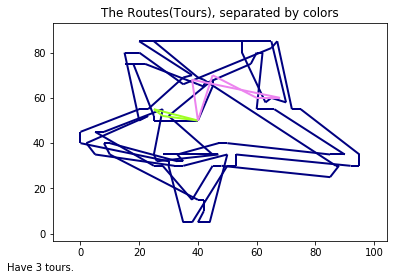

[[0, [30, 20, 43, 21, 23, 18, 36, 35, 14, 48, 9, 47, 32, 52, 26, 28, 10, 24, 1, 4, 34, 38, 16, 31, 15, 29, 41, 0, 51, 46, 25, 19, 6, 12, 3, 49, 45, 33, 50, 39, 22, 2, 11, 7, 17, 42, 27, 40, 37, 8], [20, 24, 25, 17, 18, 13, 7, 5, 3, 98, 96, 95, 90, 87, 86, 76, 78, 81, 104, 63, 65, 67, 43, 41, 42, 32, 33, 31, 57, 55, 54, 56, 53, 62, 40, 44, 35, 37, 27, 29, 19, 15, 10, 94, 92, 83, 82, 71, 70, 73, 74, 72, 61, 103, 58, 60, 45, 46, 38, 39, 101, 30, 28, 11, 9, 16, 14, 97, 93, 84, 88, 89, 99, 100, 106, 12, 6, 4, 79, 77, 80, 64, 68, 59, 48, 51, 36, 34, 23, 102, 52, 50, 66, 49, 47, 105, 69, 21, 1, 75]], [1, [13], [26, 22]], [2, [5, 44], [8, 85, 91, 2]], [3, [], []], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [13]:
start_time = time.time()
generations = 100
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2, DEMANDS, LoadCapacities,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

util.draw_tours(populations[0],LOCATIONS)
print(populations[0])

# Try GA with restricted spots!!

In [13]:
start_time = time.time()
population_size = 200
populations = []
for i in range(population_size):
    chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10)
    populations.append(chromosome)
print("Populations creation time --- %s seconds ---" % (time.time()-start_time))  
##########################################################################


Populations creation time --- 3.1801815032958984 seconds ---


In [14]:
maxSpot=10
start_time = time.time()
generations = 1000
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

Crossovers time --- 19.142090559005737 seconds ---
Distances of the best chromosome: 1869.06741812
[[6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [5, [4], [7, 11]], [4, [45], [86, 88]], [3, [23, 38], [43, 74, 64, 48]], [0, [51, 20, 48, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 44, 46, 58, 61, 103, 45, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34], [20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 16, 12, 100, 106, 6, 4]], [2, [

In [ ]:
maxSpot=10
start_time = time.time()
generations = 100
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

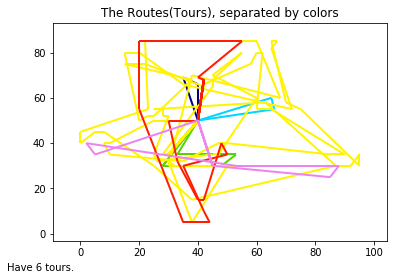

In [15]:
util.draw_tours(populations[0],LOCATIONS)